The goal of this project is to analysing the Boston dataset using the CRISP-DM methods, we will try to answer some questions 
The method to follow is <br>
1 - Business understanding <br>
2 - Data understanding <br>
3 - Data preparation <br>
4 - Modeling <br>
5 - Evaluation <br>
6 - Processing <br>

## First, we will take a look at the data

 Import all necessary libraries.

In [2]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

Read all the dataset we've export
## A look at the data

 Read all the data with right separator and pandas.

In [3]:
calendar = pd.read_csv('calendar.csv', sep=',')
listings = pd.read_csv('listings.csv', sep=',')
reviews = pd.read_csv('reviews.csv', sep=',')

In [4]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

## I - Listings dataset analysis
**1.** Let's analyse listings dataset to see columns and values

In [29]:
e = reviews['listing_id'].value_counts().dropna().reset_index()
e = pd.DataFrame(e)
e.columns = ['id', 'counts']

In [30]:
listing2 = listings.merge(e, how='outer')

In [31]:
listing2

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,counts
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,NaN,NaN,f,moderate,f,f,1,NaN,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,NaN,NaN,t,moderate,f,f,1,1.30,36.0
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,NaN,f,moderate,t,f,1,0.47,41.0
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,NaN,NaN,f,moderate,f,f,1,1.00,1.0
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,NaN,NaN,f,flexible,f,f,1,2.25,29.0
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,f,NaN,NaN,f,flexible,f,f,1,1.70,8.0
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,f,NaN,NaN,f,strict,f,f,3,4.00,57.0
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,f,NaN,NaN,f,moderate,t,t,2,2.38,67.0
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,f,NaN,NaN,f,moderate,f,f,1,5.36,65.0
9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,"This neighborhood truly has it all. Good, not...",...,f,NaN,NaN,f,strict,f,f,2,1.01,33.0


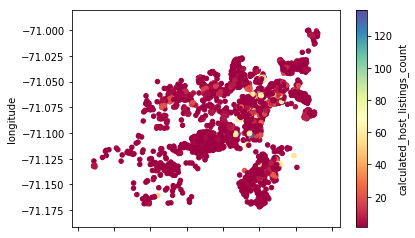

In [47]:
listings.plot(kind="scatter", x="latitude", y="longitude", c="calculated_host_listings_count", cmap=plt.get_cmap("Spectral"), colorbar=True)

**3.** get a look on dataframe number of columns and rows 
we will use this quite a lot so let's create a function

In [ ]:
len(list(set(listings['id'])))

In [ ]:
def get_dataframe_info(dataframe):
    '''
    INPUT
    dataframe - pandas dataframe 
    
    OUTPUT
    printing the numbers of row
    and columns of the dataframe

    '''
    print('number of rows of dataframe: {} \n'.format(dataframe.shape[0]))
    print('number of columns of  dataframe: {} \n'.format(dataframe.shape[1]))

In [ ]:
get_dataframe_info(listings)

**4.** get a look to categorical and numerical columns
create a function for that also

In [ ]:
def get_dataframe_categorie(dataframe):
    '''
    INPUT
    dataframe - pandas dataframe 
    
    OUTPUT
    printing the numbers of
    categorical and numerical
    variables

    '''
    numerical_dataframe = dataframe.select_dtypes(include=['number'])
    categorical_dataframe = dataframe.select_dtypes(exclude=['number'])
    print('number of numerical columns: {} \n'.format(numerical_dataframe.shape[1]))
    print('number of categorical columns: {} \n'.format(categorical_dataframe.shape[1]))

In [ ]:
get_dataframe_categorie(listings)

**5.** get infos about missing values
we will use this quite a lot so let's create a function

In [ ]:
def get_info_missing_values(dataframe):
    '''
    INPUT
    dataframe - pandas dataframe 
    
    OUTPUT
    print the missing values ratio
    for each column of the dataframe

    '''
    print(dataframe.isnull().mean().sort_values(ascending=False))

**6.** get columns with a certain percetange of missing values

In [ ]:
get_info_missing_values(listings)

**7.** We will eliminate the columns full with NaN

In [ ]:
#get columns with entire missing values
missing_columns = listings.columns[listings.isnull().mean()==1]
print('colums with no values \n {} '.format(missing_columns))

In [ ]:
# get a look at these columns data

listings_data = listings[missing_columns]
listings_data.head()

We got no data at all for these columns so are they relevants no, they dont give many informations
in the dataset, we can delete them

In [ ]:
#delete theses columns
listings = listings.drop(list(missing_columns), axis=1)

**8.** get columns with no missing values

In [ ]:
# get the columns with no missing values
clean_columns = listings.columns[listings.isnull().mean()==0]
print('columns with no missings \n {} '.format(clean_columns))

**9.** get numerical and categorical variables

In [ ]:
# get the numeric variables from listing dataset
num_vars = listings.select_dtypes(include=['number'])
print('numbers of numerical variables are {} \n'.format(len(num_vars.columns)))

# get the categorical variables from dataset
cat_vars = listings.select_dtypes(exclude=['number'])
print('numbers of categorical variables are {} \n'.format(len(cat_vars.columns)))

Let's have a view on the experience offered repartition

In [ ]:
# print all columns from the dataset
print(listings.columns,'\n')

#get the number of missing values in  property type
print('mean of listings missing {} \n'.format(listings['property_type'].isnull().mean()))


we can see that only few values is missing so got always enter the type of the house
Let's get a look on listings type repartition

In [ ]:
# get the number of property type missing in the dataset
property_type = listings['property_type'].value_counts()
(property_type/listings.shape[0]).plot(kind='bar');
plt.title('Type of listing demanded');

We can see that the most demanded type of listings is Appartment, people like to book most of the time appartmets (70%), houses come in second 

In [ ]:
# plot histogram for all the numeric values of listings
listings.hist(bins=50,figsize=((20,15)))

when analysing the hist from numerical variables, we can see that many things
- many of houses has 2 accomodates (kind of appartments)
- most of the listings have one bedroom
- 

In [ ]:
# Let's analyse specifically the appartment dataset
listings_appartments = listings[listings['property_type']=='Apartment']
listings_appartments.hist(bins=50, figsize=(20,15))

** We can notice that all the appartment got 2 pieces (most demanded house) **

**10** get a look at the different notes

In [ ]:
(listings['review_scores_value'].value_counts()/listings.shape[0]).plot(kind='bar')

People use to rate correctly houses, all the the differents Airbnb got good rates means people are really satisfied 

**11.** get a look at experience offered 

In [ ]:
(listings['price'][:10].value_counts()/listings.shape[0]).plot(kind='bar')

## II - Reviews dataset analysis
**1.** Let's analyse reviews dataset to see columns and values, potential missing values

In [ ]:
reviews.head()

In [ ]:
get_info_missing_values(reviews)

There's not a lot of missing values in this dataset

## III - Calendar dataset analysis
**1.** Let's analyse reviews dataset to see columns and values, potential missing values

In [ ]:
calendar.head(15)

In [ ]:
get_info_missing_values(calendar)

### Conclusion
Nothing of interest to see or to plot in the reviews and calendar dataset but we can see a link between all the .csv dataset, this is interesting for answering the our questions. 
So we will try to answers these questions <br>  **1.** Where is the peak of demand in AirBnB at Boston?
<br> **2.** How often the same people book the same house and why? <br> **3.** Is there a link between AirBnB prices and the period of booking? <br> **4.** Guess the house review according to house's characteristics and instant of booking <br> **5.** Guess the house price according to house's characteristics and instant of booking
